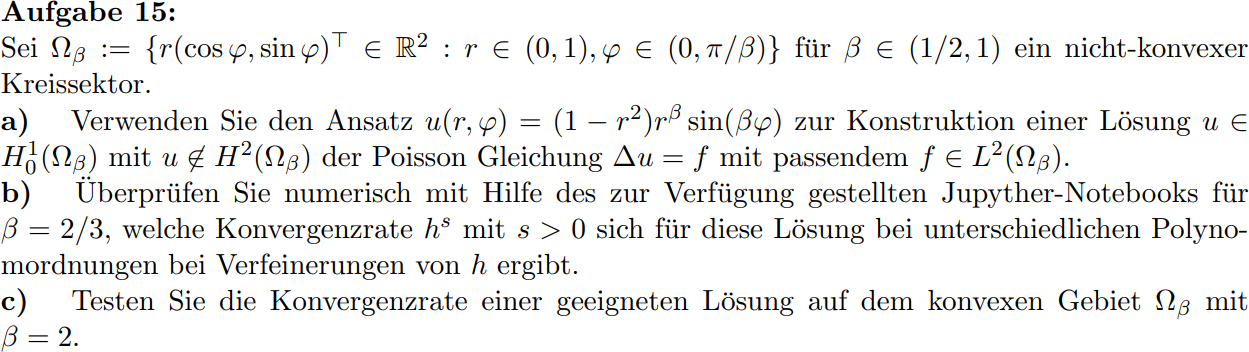

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import ngsolve as ngs
# from ngsolve import *

from ngsolve.webgui import Draw
from netgen.geom2d  import SplineGeometry

from math import pi

$\textbf{a)}$ Wir zeigen die Aussage direkt mit dem Vorgeschlagenen $u$, also 

\begin{align*}
    u(r, \varphi) & := (1 - r^2) r^\beta \sin(\beta \varphi) \\
    f(r, \varphi) & := -\Delta u(r, \varphi) = (4 \beta + 4) r^\beta \sin(\varphi \beta)
\end{align*}

Da $u$ stetig ist, ist der Trace-Operator nichts anderes als die Einschränkung $u|_{\partial \Omega_\beta}$. Betrachten wir die Randstücke einzeln:

\begin{align*}
    u(0, \varphi) =& (1-0^2)0 \sin(\varphi) &= 0 \\
    u(r, 0) =& (1-r^2)r^\beta \sin(0) &= 0 \\
    u(1, \varphi) =& (1-1) \sin(\beta \varphi) &= 0 \\
    u(r, \frac{\pi}{\beta}) =& (1-r^2) r^\beta \sin(\pi) &= 0 \\
\end{align*}

Um noch $u \in H^1(\Omega_\beta)$ zu zeigen, zeigen wir $\left \| u \right \|_{L^2(\Omega_\beta)} < \infty$ und $\left \| \nabla u \right \|_{L^2(\Omega_\beta)} < \infty$:

\begin{align*}
    \left \| u \right \|_{L^2(\Omega_\beta)} =&
    \int_0^1 
        \int_0^\frac{\pi}{\beta} 
            |(1-r^2) r^\beta \sin(\beta \varphi)|^2
        \mathrm{d}\varphi \mathrm{dr} = 
    \int_0^1 |(1-r^2)r^\beta|^2 \mathrm{dr}
    \int_0^\frac{\pi}{\beta} |\sin(\beta \varphi)|^2 \mathrm{d}\varphi
    \leq
    \frac{8}{8 \beta^3 + 36 \beta^2 + 46 \beta + 15} \cdot \frac{\pi}\beta
    < \infty \\
    \left \| \nabla u \right \|_{L^2(\Omega_\beta)} =&
    \int_0^1 
        \int_0^\frac{\pi}{\beta} 
            |\partial_r u|^2
        \mathrm{d}\varphi \mathrm{dr}
    +
    \int_0^1 
        \int_0^\frac{\pi}{\beta} 
            |\partial_\varphi u|^2
        \mathrm{d}\varphi \mathrm{dr} = \\
    &\int_0^1 
        \int_0^\frac{\pi}{\beta} 
            |-r^{\beta-1}(\beta r^2 - \beta + 2 r^2)\sin(\beta \varphi)|^2
        \mathrm{d}\varphi \mathrm{dr}
    +
    \int_0^1 
        \int_0^\frac{\pi}{\beta} 
            |\beta r^\beta (1-r^2) \cos(\beta\varphi)|^2
        \mathrm{d}\varphi \mathrm{dr} \\
    &\leq
    \frac{\pi}{\beta}( \int_0^1 |-r^{\beta-1}(\beta r^2 - \beta + 2 r^2)|^2 \mathrm{dr} + 
    \int_0^1 |\beta r^\beta (1- r^2)|^2 \mathrm{dr}) =
    \frac{\pi}{\beta}(\frac{8 \beta^2 + 8 \beta}{8 \beta^3 +12 \beta^2 - 2 \beta - 3} +
                      \frac{8 \beta^2}{8 \beta^3 + 36 \beta^2 + 46 \beta + 15})
    < \infty
\end{align*}

Um nun $u \notin H^2(\Omega_\beta)$ zu zeigen rechnen wir nach:

\begin{align*}
    \left \| \mathrm{D}^2u \right \|_{L^2(\Omega_\beta)} =&
    \int_0^1 
        \int_0^\frac{\pi}{\beta} 
            |-r^{\beta-2}(\beta^2 r^2 + 3\beta r^2 + \beta + 2r^2) \sin(\beta\varphi)|^2
        \mathrm{d}\varphi \mathrm{dr}
    +
    2 \int_0^1 
        \int_0^\frac{\pi}{\beta} 
            |-\beta r^{\beta-1}(\beta r^2 - \beta + 2r^2) \cos(\beta \varphi)|^2
        \mathrm{d}\varphi \mathrm{dr} \\
    +&
    \int_0^1 
        \int_0^\frac{\pi}{\beta} 
            |(1-r^2) r^\beta \sin(\beta \varphi)|^2
        \mathrm{d}\varphi \mathrm{dr}
\end{align*}

Betrachten wir das erste Integral:

\begin{align*}
    \int_0^1 
        \int_0^\frac{\pi}{\beta} 
            |-r^{\beta-2}(\beta^2 r^2 + 3\beta r^2 + \beta + 2r^2) \sin(\beta\varphi)|^2
        \mathrm{d}\varphi \mathrm{dr} =
     \int_0^1 |-r^{\beta-2}(\beta^2 r^2 + 3\beta r^2 + \beta + 2r^2)|^2 \mathrm{dr} 
         \int_0^\frac{\pi}{\beta}|\sin(\beta\varphi)|^2 \mathrm{d}\varphi =
     \big(
         \frac{(\beta^2 + 3\beta + 2)^2}{2\beta +1} + \frac{2(\beta^2 + 3\beta +2)(\beta - \beta^2)}{2\beta -1} + 
         (\beta-\beta^2) \int_0^1 \underbrace{r^{2\beta-4}}_{\geq r^{2-4}} \mathrm{dr}
     \big)  \int_0^\frac{\pi}{\beta}|\sin(\beta\varphi)|^2 \mathrm{d}\varphi \\
     \geq
     \big(
         \frac{(\beta^2 + 3\beta + 2)^2}{2\beta +1} + \frac{2(\beta^2 + 3\beta +2)(\beta - \beta^2)}{2\beta -1} + 
         (\beta-\beta^2) \int_0^1 r^{-2} \mathrm{dr}
     \big)  \int_0^\frac{\pi}{\beta}|\sin(\beta\varphi)|^2 \mathrm{d}\varphi = 
     \infty
\end{align*}

Damit gilt auch $\left \| \mathrm{D}^2u \right \|_{L^2(\Omega_\beta)} = \infty$ und somit $u \notin H^2(\Omega_\beta)$

In [2]:
r, phi, beta = sp.symbols('r varphi beta')

u = (1 - r ** 2) * r ** beta * sp.sin(beta * phi)
display(u)

Du = sp.Matrix([
    u.diff(r)  .simplify(),
    u.diff(phi).simplify()
])
display(Du)

DDu = sp.Matrix([
    [
        u.diff(r)  .diff(r).simplify(),
        u.diff(phi).diff(r).simplify()
    ],
    [
        u.diff(r)  .diff(phi).simplify(),
        u.diff(phi).diff(phi).simplify()
    ]
])
display(DDu)

laplace_u = sp.simplify(
    u.diff(r, 2) + 1/r * u.diff(r) + 1/r ** 2 * u.diff(phi, 2)
)
display(laplace_u)

r**beta*(1 - r**2)*sin(beta*varphi)

Matrix([
[-r**(beta - 1)*(beta*r**2 - beta + 2*r**2)*sin(beta*varphi)],
[                   beta*r**beta*(1 - r**2)*cos(beta*varphi)]])

Matrix([
[-r**(beta - 2)*(beta**2*r**2 - beta**2 + 3*beta*r**2 + beta + 2*r**2)*sin(beta*varphi), -beta*r**(beta - 1)*(beta*r**2 - beta + 2*r**2)*cos(beta*varphi)],
[                      -beta*r**(beta - 1)*(beta*r**2 - beta + 2*r**2)*cos(beta*varphi),                      beta**2*r**beta*(r**2 - 1)*sin(beta*varphi)]])

-4*r**beta*(beta + 1)*sin(beta*varphi)

$\begin{align*}
    r & = \sqrt{x^2 + y^2} \\
    \varphi
    & =
    \arctan_2(x, y)
    =
    \begin{cases}
        \arctan \frac{y}{x}         & \text{für}~ x > 0 \\
        (\arctan \frac{y}{x}) + \pi & \text{für}~ x < 0, y > 0 \\
        \pm \pi                     & \text{für}~ x < 0, y = 0 \\
        (\arctan \frac{y}{x}) - \pi & \text{für}~ x < 0, y < 0 \\
        + \frac{\pi}{2}             & \text{für}~ x = 0, y > 0 \\
        - \frac{\pi}{2}             & \text{für}~ x = 0, y < 0
    \end{cases}
\end{align*}$

$\textbf{b)}$
Wir sehen, dass diese Funktion selbst bei höherer Ordnung nicht einmal linear konvergiert, da $u \notin H^2(\Omega_\beta)$.

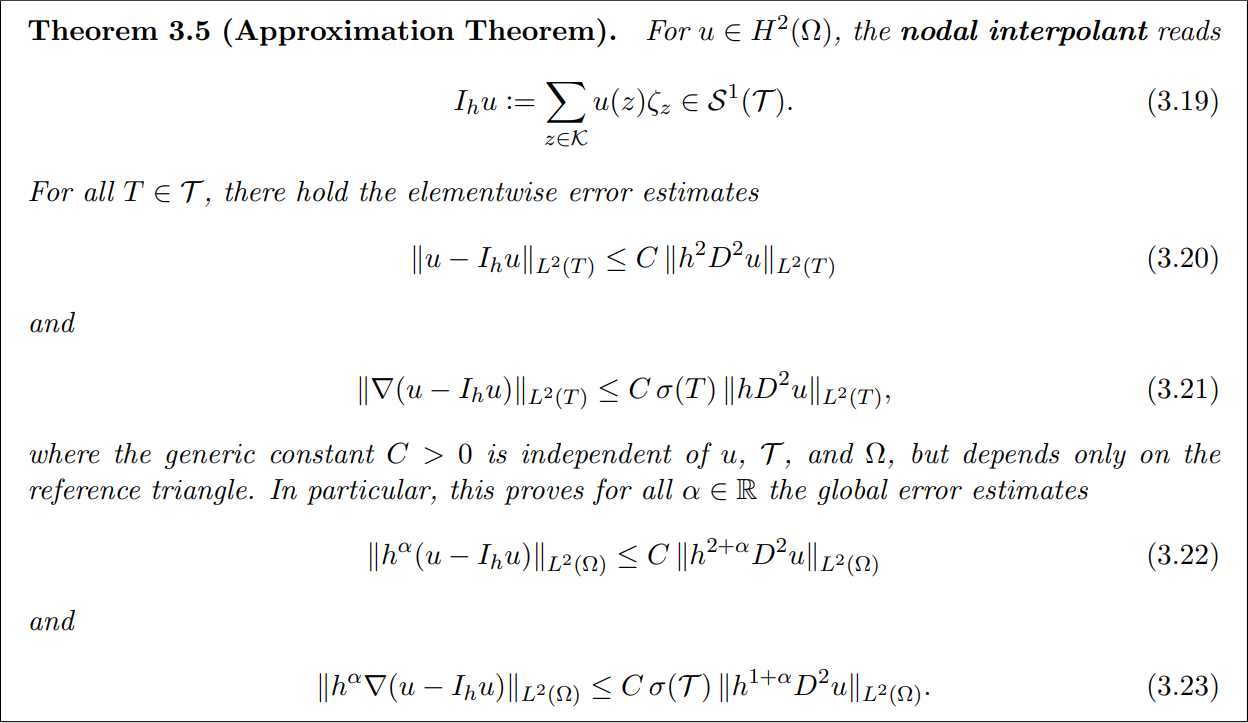

NGSWebGuiWidget(value={'ngsolve_version': '6.2.2008', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'draw_vol': F…

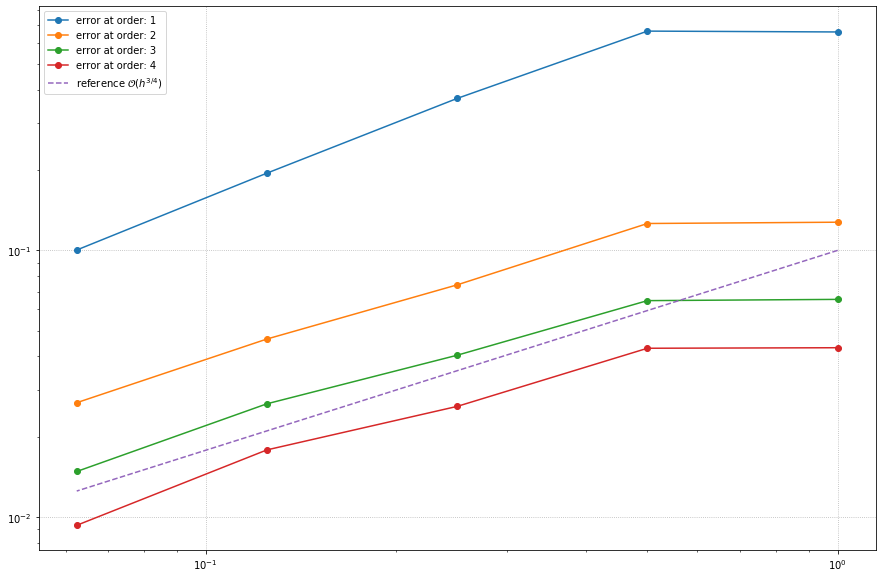

In [6]:
beta = 2/3
R = 1

r = ngs.sqrt(ngs.x ** 2 + ngs.y ** 2)
phi = pi / 2 - ngs.IfPos(-ngs.y, ngs.IfPos(-ngs.x, ngs.atan2(ngs.x, ngs.y), ngs.IfPos(ngs.x, ngs.atan2(ngs.x, ngs.y), -pi)), ngs.atan2(ngs.x, ngs.y))

ex_sol = (R ** 2 - r ** 2) * r ** beta * ngs.sin(phi * beta)
rhs = (4 * beta + 4) * r ** beta * ngs.sin(phi * beta)

ex_sol_grad = ngs.CoefficientFunction(
    (
        ex_sol.Diff(ngs.x),
        ex_sol.Diff(ngs.y)
    )
)

eps = 1e-8
r_eps = ngs.sqrt(
    (ngs.x + eps) ** 2 + (ngs.y + eps) ** 2
)

grad_eps = ((R**2-r_eps**2)*beta*r_eps**(beta-1)*ngs.sin(phi*beta)-2*r_eps**(beta+1)*ngs.sin(phi*beta))*ngs.CoefficientFunction( (ngs.cos(phi),ngs.sin(phi)) ) + beta*(R**2-r_eps**2)*r_eps**(beta-1)*ngs.cos(phi*beta)*ngs.CoefficientFunction( (-ngs.sin(phi),ngs.cos(phi)) )
sol_grad = ngs.IfPos(r, ex_sol_grad, grad_eps)

geo = SplineGeometry()
pnts = [(0, 0), (R, 0), (R, R), (0, R), (-R, R), (-R, 0), (-R, -R), (0, -R)]

pind = [geo.AppendPoint(*pnt) for pnt in pnts]

# (Control-) Point positions
#  4        3        2
#           
#
#
#  5        0        1
#           
#           
#           
#  6        7

# line from pind[0] to pind[1]
geo.Append(['line', pind[0], pind[1]], bc = "outer")

# spline from point pind[1] to pind[3] with control point pind[2]
geo.Append(['spline3', pind[1], pind[2], pind[3]], bc = "outer")

 # spline from point pind[3] to pind[5] with control point pind[4]
geo.Append(['spline3', pind[3], pind[4], pind[5]], bc = "outer")

# spline from point pind[5] to pind[7] with control point pind[6]
geo.Append(['spline3', pind[5], pind[6], pind[7]], bc = "outer")

# line from pind[7] to pind[0]
geo.Append(['line', pind[7], pind[0]], bc = "outer")


# -------------------------------- #

h_array = [2 ** -n for n in range(5)]
order_array = [1, 2, 3, 4]
#order_array = [1]

error_arrays = []

for order in order_array:
    
    error_array = []
    
    for h in h_array:
        
        mesh = ngs.Mesh(geo.GenerateMesh(maxh = h))
        mesh.Curve(order)
        
        fes = ngs.H1(mesh, order = order, dirichlet = "outer")
        sol = ngs.GridFunction(fes)
        
        u, v = fes.TnT()

        a = ngs.BilinearForm(fes, symmetric = True)
        a += ngs.grad(u) * ngs.grad(v) * ngs.dx
        a.Assemble()

        f = ngs.LinearForm(fes)
        f += rhs * v * ngs.dx
        f.Assemble()

        sol.vec.data = a.mat.Inverse(freedofs = fes.FreeDofs()) * f.vec
        if h == 2**-4 and order == 1:
            Draw(ex_sol - sol, mesh, "sol")
        H1err = ngs.sqrt(
            ngs.Integrate(
                (ex_sol - sol) ** 2 + ngs.InnerProduct(
                    ex_sol_grad - ngs.Grad(sol),
                    ex_sol_grad - ngs.Grad(sol)
                ),
                mesh
            )
        )

        error_array.append(H1err)

    error_arrays.append(error_array)

h_array = np.array(h_array)
order_array = np.array(order_array)
error_arrays = np.array(error_arrays)

s_array = [1, 2, 3, 4]

fig = plt.figure(figsize = (15, 10))

for n, order in enumerate(order_array):
    plt.loglog(h_array, error_arrays[n], 'o-', label = f'error at order: {order}')

#for s in s_array:
#    plt.loglog(h_array, h_array ** s, label = 'reference: $' + r'\mathcal{O}(h^{{' + str(s) + r'}})$')
    
plt.loglog(h_array, h_array ** (3/4)* 1/10, label = 'reference $\mathcal{O}(h^{3/4})$', ls = "--")


plt.legend()
plt.grid(linestyle = ':')
plt.show()

$\textbf{c)}$ Auf diesem Gebiet ist unsere Funktion $u \in H^2(\Omega_2)$, daher erhalten wir Konvergenzordnung $h^m$ wobei $m$ die Polynomordnung bezeichnet.

IndexError: index 1 is out of bounds for axis 0 with size 1

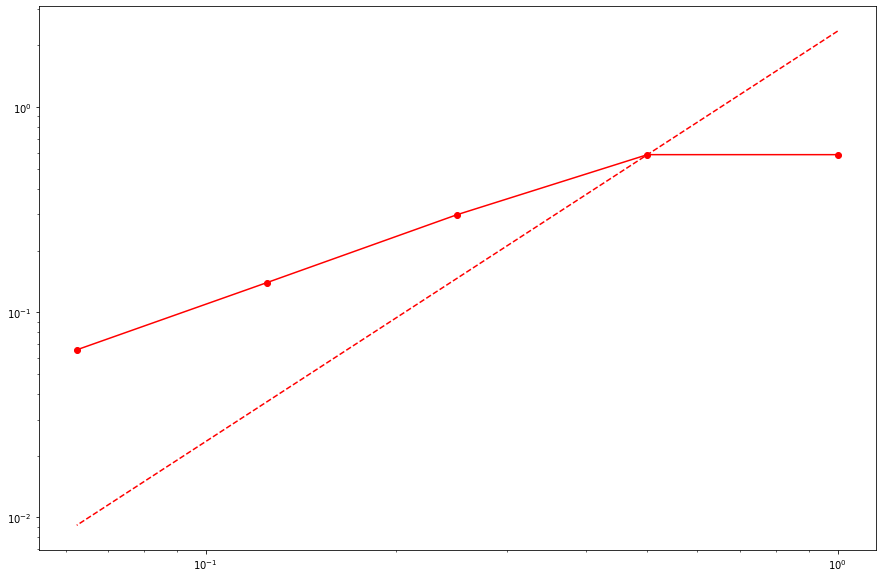

In [4]:
beta = 2
R = 1

r = ngs.sqrt(ngs.x ** 2 + ngs.y ** 2)
phi = pi / 2 - ngs.IfPos(-ngs.y, ngs.IfPos(-ngs.x, ngs.atan2(ngs.x, ngs.y), ngs.IfPos(ngs.x, ngs.atan2(ngs.x, ngs.y), -pi)), ngs.atan2(ngs.x, ngs.y))

ex_sol = (R ** 2 - r ** 2) * r ** beta * ngs.sin(phi * beta)
rhs = (4 * beta + 4) * r ** beta * ngs.sin(phi * beta)

ex_sol_grad = ngs.CoefficientFunction(
    (
        ex_sol.Diff(ngs.x),
        ex_sol.Diff(ngs.y)
    )
)

eps = 1e-8
r_eps = ngs.sqrt(
    (ngs.x + eps) ** 2 + (ngs.y + eps) ** 2
)

grad_eps = ((R**2-r_eps**2)*beta*r_eps**(beta-1)*ngs.sin(phi*beta)-2*r_eps**(beta+1)*ngs.sin(phi*beta))*ngs.CoefficientFunction( (ngs.cos(phi),ngs.sin(phi)) ) + beta*(R**2-r_eps**2)*r_eps**(beta-1)*ngs.cos(phi*beta)*ngs.CoefficientFunction( (-ngs.sin(phi),ngs.cos(phi)) )
sol_grad = ngs.IfPos(r, ex_sol_grad, grad_eps)

geo = SplineGeometry()
# pnts = [(0, 0), (R, 0), (R, R), (0, R), (-R, R), (-R, 0), (-R, -R), (0, -R)]
pnts = [(0, 0), (R, 0), (R, R), (0, R)]
pind = [geo.AppendPoint(*pnt) for pnt in pnts]

# line from pind[0] to pind[1]
geo.Append(['line', pind[0], pind[1]], bc = "outer")

# spline from point pind[1] to pind[3] with control point pind[2]
geo.Append(['spline3', pind[1], pind[2], pind[3]], bc = "outer")

# # spline from point pind[3] to pind[5] with control point pind[4]
# geo.Append(['spline3', pind[3], pind[4], pind[5]], bc = "outer")

# # spline from point pind[5] to pind[7] with control point pind[6]
# geo.Append(['spline3', pind[5], pind[6], pind[7]], bc = "outer")

# # line from pind[7] to pind[0]
# geo.Append(['line', pind[7], pind[0]], bc = "outer")

# line from pind[3] to pind[0]
geo.Append(['line', pind[3], pind[0]], bc = "outer")

# -------------------------------- #

h_array = [2 ** -n for n in range(5)]
order_array = [1]

error_arrays = []

for order in order_array:
    
    error_array = []

    for h in h_array:

        mesh = ngs.Mesh(geo.GenerateMesh(maxh = h))
        mesh.Curve(order)

        fes = ngs.H1(mesh, order = order, dirichlet = "outer")
        sol = ngs.GridFunction(fes)

        u, v = fes.TnT()

        a = ngs.BilinearForm(fes, symmetric = True)
        a += ngs.grad(u) * ngs.grad(v) * ngs.dx
        a.Assemble()

        f = ngs.LinearForm(fes)
        f += rhs * v * ngs.dx
        f.Assemble()

        sol.vec.data = a.mat.Inverse(freedofs = fes.FreeDofs(), inverse = 'sparsecholesky') * f.vec

        H1err = ngs.sqrt(
            ngs.Integrate(
                (ex_sol - sol) ** 2 + ngs.InnerProduct(
                    ex_sol_grad - ngs.Grad(sol),
                    ex_sol_grad - ngs.Grad(sol)
                ),
                mesh
            )
        )

        error_array.append(H1err)

        #Draw((ex_sol-sol)**2 + ngs.InnerProduct(sol_grad-ngs.Grad(sol),sol_grad-ngs.Grad(sol)), mesh)

    error_arrays.append(error_array)

h_array = np.array(h_array)
order_array = np.array(order_array)
error_arrays = np.array(error_arrays)

s_array = [2, 3, 4, 5]

fig = plt.figure(figsize = (15, 10))

color_array = ["r","g","b","c","m"]

for (n, order), color in zip(enumerate(order_array),color_array):
    plt.loglog(h_array, error_arrays[n], 'o-', label = f'error at order: {order}', color = color)

for s, color in zip(s_array,color_array):
    plt.loglog(h_array, (h_array ** s) * error_arrays[s-2][1]/h_array[1]*2**(s-1), label = 'reference: $' + r'\mathcal{O}(h^{{' + str(s) + r'}})$', color = color, ls = "--")


plt.legend()
plt.grid(linestyle = ':')
plt.show()